In [35]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv("heart_disease.txt")
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


<AxesSubplot:>

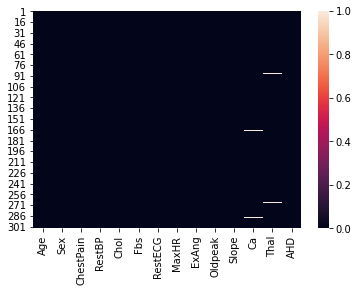

In [36]:
import seaborn as sns
sns.heatmap(data.isnull())

In [37]:
null_list_1 = data[data["Ca"].isnull()].index.tolist()
null_list_1

[167, 193, 288, 303]

In [38]:
null_list_2 = data[data["Thal"].isnull()].index.tolist()
null_list_2

[88, 267]

In [39]:
null_list = null_list_1 + null_list_2
null_list

[167, 193, 288, 303, 88, 267]

In [40]:
data.drop(index = null_list, axis = 0, inplace = True)
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


<AxesSubplot:>

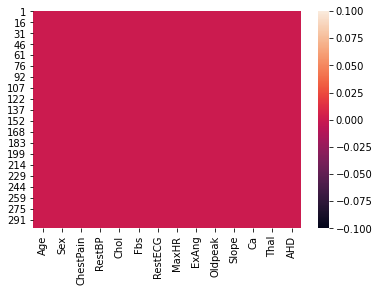

In [41]:
sns.heatmap(data.isnull())

In [42]:
# sns.pairplot(data, hue = "AHD")

In [43]:
# data["AHD"] = pd.Categorical(data["AHD"]).codes
def label_mod(x):
    if x == "Yes":
        return 1
    else:
        return 0

data_y = data["AHD"].apply(label_mod)
data_y

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int64

<AxesSubplot:>

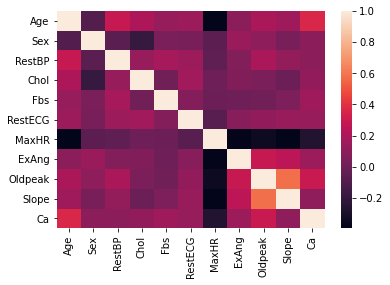

In [44]:
sns.heatmap(data.corr())

In [45]:
data.drop(labels = "AHD", axis  = 1, inplace = True)
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable


In [46]:
data_x = pd.get_dummies(data, drop_first = True)
data_x

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,0,0,0,0,1
299,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,1,0,1
300,68,1,144,193,1,0,141,0,3.4,2,2.0,0,0,0,0,1
301,57,1,130,131,0,0,115,1,1.2,2,1.0,0,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(data_x_train, data_y_train)

rf_y_pred = rf_model.predict(data_x_test)

In [48]:
from sklearn.metrics import accuracy_score
print("Accuracy of the RF Model:", accuracy_score(data_y_test, rf_y_pred) * 100,"%")

Accuracy of the RF Model: 78.33333333333333 %


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_y_test, rf_y_pred)

array([[28,  8],
       [ 5, 19]], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(data_x_train, data_y_train)

dt_y_pred = dt_model.predict(data_x_test)
print("Accuracy of the DT Model:", accuracy_score(data_y_test, dt_y_pred) * 100,"%")


Accuracy of the DT Model: 70.0 %


In [51]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(data_x_train, data_y_train)

log_y_pred = log_model.predict(data_x_test)
print("Accuracy of the Logistic Regression Model:", accuracy_score(data_y_test, log_y_pred) * 100,"%")

Accuracy of the Logistic Regression Model: 78.33333333333333 %


In [1]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#Initializing parameters
#No. of trees 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#No. of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
#Max. no. of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
#Min. no. of samples required to split a node
min_samples_split = [2,5,8,13]
#Min. no. of samples requried at each  leaf node
min_samples_leaf = [1,3,5,7,9]

random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth, 
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}
random_grid


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 8, 13],
 'min_samples_leaf': [1, 3, 5, 7, 9]}

In [53]:
random_cv = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 1, random_state= 100)
# random_cv.fit(data_x_train, data_y_train)

In [54]:
# random_cv.best_params_

In [55]:
# random_cv_y = random_cv.predict(data_x_test)
# print("Accuracy Score:", accuracy_score(data_y_test, random_cv_y))

In [56]:
#GridSearchCv
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1800, num = 4)]
min_samples_split = [3,5,7]
min_samples_leaf = [7,9,11]
max_features = ['auto']
max_depth = [450]

grid_param_list = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'max_depth': max_depth
}

grid_param_list

{'n_estimators': [1000, 1266, 1533, 1800],
 'min_samples_split': [3, 5, 7],
 'min_samples_leaf': [7, 9, 11],
 'max_features': ['auto'],
 'max_depth': [450]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv_model = GridSearchCV(estimator = rf_model, param_grid = grid_param_list, cv = 3, verbose = 3)
grid_cv_model.fit(data_x_train, data_y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1000;, score=0.823 total time=   3.4s
[CV 2/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1000;, score=0.835 total time=   3.6s
[CV 3/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1000;, score=0.810 total time=   3.5s
[CV 1/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1266;, score=0.797 total time=   4.6s
[CV 2/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1266;, score=0.848 total time=   4.5s
[CV 3/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=1266;, score=0.823 total time=   4.4s
[CV 1/3] END max_depth=450, max_features=auto, min_samples_leaf=7, min_samples_split=3, n_estimators=153

[CV 3/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=1800;, score=0.823 total time=   6.3s
[CV 1/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.823 total time=   3.5s
[CV 2/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.848 total time=   3.2s
[CV 3/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.823 total time=   3.2s
[CV 1/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1266;, score=0.810 total time=   3.3s
[CV 2/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1266;, score=0.835 total time=   2.7s
[CV 3/3] END max_depth=450, max_features=auto, min_samples_leaf=9, min_samples_split=7, n_estimators=1266;, score=0.823 total time=   3.9s
[CV 1/3] END max_depth=450,

In [ ]:
grid_y_data = grid_cv_model.predict(data_x_test)
accuracy_score(data_y_test, grid_y_data) 